<a href="https://colab.research.google.com/github/BrianvanWinden/TM10007_Group_13/blob/master/Code_opgeschoond_en_werkend_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing functions

In [1]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets as ds
from scipy.stats import randint
from zipfile import ZipFile
from scipy import stats
from statistics import stdev


# Classifiers and kernels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Regularization
from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.feature_selection import SelectFromModel

# Model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, learning_curve, ShuffleSplit, StratifiedKFold

from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

# Sampling
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler

from sklearn.pipeline import make_pipeline



def evaluation(y_val, y_pred, title = 'Confusion Matrix'):
    cm = confusion_matrix(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    # print('Recall: ', recall)
    # print('Accuracy: ', accuracy)
    # print('Precision: ', precision)
    # print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)

def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt




def roc_plotter(fpr, tpr, roc_auc):
    """ Plot the ROC curve of the classifier for the given number of components

    - param numpy.array fpr: False positive rate
    - param numpy.array tpr: True positive rate
    - param integer roc_auc: Area under the ROC curve
    """
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (area = {roc_auc:0.2f})')

    # Properties ROC curve figure
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Assignment arrhythmia classification

In [2]:
# Run this to use from colab environment
!git clone https://github.com/BrianvanWinden/TM10007_Group_13.git
!unzip "/content/TM10007_Group_13/ecg/ecg_data.zip"

data = pd.read_csv("ecg_data.csv") 

data_points_org= data.drop(['label', 'Unnamed: 0'], axis=1).to_numpy()
data_labels_org= data['label'].to_numpy()

# data_points = np.delete(data_points_org, [91, 284, 422, 611] , axis=0)
# data_labels = np.delete(data_labels_org, [91, 284, 422, 611] , axis=0)

data_points = data_points_org
data_labels = data_labels_org

print (data_labels.shape)
print (data_points.shape)


x_train_val, x_test, y_train_val, y_test = train_test_split(data_points, data_labels, test_size=0.2, stratify=data_labels)



Cloning into 'TM10007_Group_13'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 120 (delta 55), reused 47 (delta 14), pack-reused 0
Receiving objects: 100% (120/120), 69.29 MiB | 35.39 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Archive:  /content/TM10007_Group_13/ecg/ecg_data.zip
  inflating: ecg_data.csv            
(827,)
(827, 9000)


# Taking a look at the data

In [8]:
# Samples and features
# print(data)
print(f'The number of samples: {len(data.index)}')
shape_data = data_points.shape
print(f'The number of features: {shape_data[1]}')
total_datapoints = shape_data[0]*shape_data[1]
print(f'Total number of datapoints: {total_datapoints}')
healthy_patients = (list(data['label'] == 0)).count(True)
print(f'The number of healthy patients: {healthy_patients}') 
sick_patients = (list(data['label'] == 1)).count(True)
print(f'The number of sick patients: {sick_patients}')
percentage_sick=sick_patients/(sick_patients+healthy_patients)
print(f'Percentage of sick patients: {round(percentage_sick,2)*100}%')

# Determine Z-scores 
z = np.abs(stats.zscore(data_points_org))
outliers = np.where(z>3)
number_outliers = len(x[1])
print(f'Number of datapoints where the Z score is larger than 3: {number_outliers}')


percentage = number_outliers/total_datapoints*100
print(f'Percentage of outliers in total data: {round(percentage,2)}%')

# Missing values
missing_values = data.isna().sum()
number_missing_values = missing_values.astype(bool).sum(axis=0)
print(f'Number of missing data points:{number_missing_values}')




The number of samples: 827
The number of features: 9000
Total number of datapoints: 7443000
The number of healthy patients: 681
The number of sick patients: 146
Percentage of sick patients: 18.0%
Number of datapoints where the Z score is larger than 3: 57812
Percentage of outliers in total data: 0.78%
Number of missing data points:0


# Learning curves

In [13]:
# Learning Curve


clsfs = {'linSVC': LinearSVC(class_weight='balanced', dual=False, max_iter=10000), 
          'SVMrbf':SVC(kernel='rbf', class_weight='balanced'), 
          'SVMlin': SVC(kernel='linear', class_weight='balanced'), 
          'Logreg': LogisticRegression(class_weight='balanced', dual=False, max_iter=10000),
          'knn': KNeighborsClassifier(weights='distance')}
                  

num = 0
fig = plt.figure(figsize=(24,8*len(clsfs)))
ax = fig.add_subplot(7, 3, num + 1)
ax.scatter(data_points[:, 0], data_points[:, 1], marker='o', c=data_labels, 
           s=25, edgecolor='k', cmap=plt.cm.Paired)

cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
num = 1
for key, clf in clsfs.items():
    title = str(key)
    ax = fig.add_subplot(7, 3, num + 1)
    plot_learning_curve(clf, title, data_points, data_labels, ax, ylim=(0.3, 1.01), cv=cv)
    num += 1




SyntaxError: ignored

# PCA plot


<function matplotlib.pyplot.show>

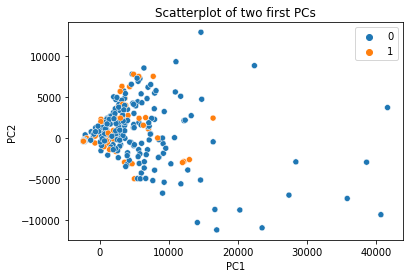

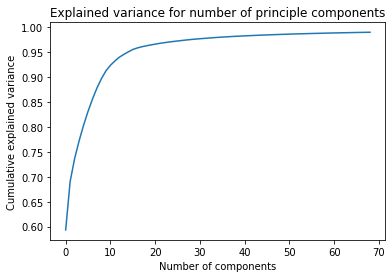

In [10]:
pca = PCA(n_components=0.99)
pca = pca.fit(data_points)
x_trans = pca.transform(data_points)
y = data_labels

plt.figure(0)
sns.scatterplot(x=x_trans[:, 0], y=x_trans[:, 1], hue=y) # Scatterplot of two first PCs
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of two first PCs')

plt.figure(1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
ratio = pca.explained_variance_ratio_.cumsum()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance for number of principle components')
plt.show


# Preprocessing and classifier validation

In [9]:
# Splitting data  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

cv_outer = StratifiedKFold(n_splits=5, shuffle=True)
cv_inner = StratifiedKFold(n_splits=3, shuffle=True)
outer_results = list()
all_scores = list()
models = list()

for train_ix, val_ix in cv_outer.split(x_train_val,y_train_val):
  # split data
  x_train, x_val = x_train_val[train_ix, :], x_train_val[val_ix, :]
  y_train, y_val = y_train_val[train_ix], y_train_val[val_ix]
  print (x_train.shape)
  print (x_val.shape)
  #Resampling
  resample = RandomUnderSampler(sampling_strategy='majority')
  x_resampled, y_resampled = resample.fit_resample(x_train, y_train)


  #Scaling
  scaler = preprocessing.RobustScaler()
  scaler.fit(x_resampled)
  x_train_scaled = scaler.transform(x_resampled)
  x_val_scaled = scaler.transform(x_val)

  #PCA
  pca = PCA(n_components=0.99)
  pca = pca.fit(x_train_scaled)
  x_train_trans = pca.transform(x_train_scaled)
  x_val_trans = pca.transform(x_val_scaled)
  print(f'Amount of trainingsamples after resampling: {x_train_trans.shape[0]}')
  print(f'Amount of features from PCA: {x_train_trans.shape[1]}')
  model_params = {
                  'svm_rbf': 
                  {'model': SVC(kernel='rbf', class_weight='balanced'),
                    'params': {'C': np.arange(0.01,100,0.01),
                               'gamma': np.arange(0.01,100,0.01)
                               }
                  },
                   'svm_lin': 
                  {'model': SVC(kernel='linear', class_weight='balanced'),
                    'params': {'C': np.arange(0.01,100,0.01)
                               }
                   },
                  'linsvc': 
                  {'model': LinearSVC(class_weight='balanced', dual=False, max_iter=10000),
                   'params':{'C': np.arange(0.01,100,0.01)
                             }
                  },
                  'logreg':
                  {'model': LogisticRegression(class_weight='balanced', dual=False, max_iter=10000),
                   'params':{'C': np.arange(0.01,100,0.01)
                             }                      
                  },
                  'knn':
                  {'model': KNeighborsClassifier(weights='distance'),
                   'params':{
                        'n_neighbors': [5,10,15],
                        'leaf_size': np.arange(1,100,1)
                             }
                   }
                }

  for model_name, mp in model_params.items():
    search = RandomizedSearchCV(mp['model'], mp['params'], cv = cv_inner, scoring = 'roc_auc', return_train_score=True)
    result = search.fit(x_train_scaled, y_resampled)
    best_model = result.best_estimator_
    models.append(best_model)
    yhat = best_model.predict(x_val_scaled)
    auc_score_val = roc_auc_score(y_val, yhat)
    outer_results.append(auc_score_val)
    all_scores.append(result.best_score_)
    (f'Model:{model_name}, best parameters:{result.best_params_}, auc: {round(auc_score_val, 3)}, result.best_score_:{round(result.best_score_, 3)}')

(528, 9000)
(133, 9000)
Amount of trainingsamples after resampling: 186
Amount of features from PCA: 30
(529, 9000)
(132, 9000)
Amount of trainingsamples after resampling: 188
Amount of features from PCA: 143
(529, 9000)
(132, 9000)
Amount of trainingsamples after resampling: 188
Amount of features from PCA: 132
(529, 9000)
(132, 9000)
Amount of trainingsamples after resampling: 188
Amount of features from PCA: 27
(529, 9000)
(132, 9000)
Amount of trainingsamples after resampling: 186
Amount of features from PCA: 115


# Best classifier for test set

,Auc score,Best score,Model
13,0.741125,0.661626,"LogisticRegression(C=63.839999999999996, class..."
11,0.731951,0.638560,"SVC(C=69.10000000000001, break_ties=False, cac..."
16,0.723973,0.651047,"SVC(C=45.55, break_ties=False, cache_size=200,..."
18,0.706821,0.678688,"LogisticRegression(C=6.32, class_weight='balan..."
3,0.684060,0.719736,"LogisticRegression(C=39.6, class_weight='balan..."
12,0.683885,0.668639,"LinearSVC(C=34.3, class_weight='balanced', dua..."
8,0.678301,0.675035,"LogisticRegression(C=25.87, class_weight='bala..."
6,0.673714,0.639915,"SVC(C=58.9, break_ties=False, cache_size=200, ..."
17,0.666733,0.697700,"LinearSVC(C=80.31, class_weight='balanced', du..."
7,0.664539,0.690405,"LinearSVC(C=51.949999999999996, class_weight='..."


The best classifier is: LogisticRegression(C=63.839999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
Misclassified: 56 / 166
Auc score test data: 0.6461112509438711


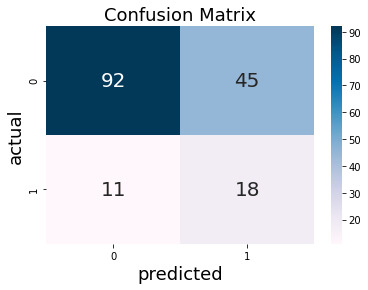

In [11]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

models_df = pd.DataFrame(models)
outer_results_df = pd.DataFrame(outer_results)
all_scores_df = pd.DataFrame(all_scores)
results = pd.concat([outer_results_df, all_scores_df, models_df], axis=1)
results.columns = [ 'Auc score', 'Best score', 'Model']
results_sorted = results.sort_values(by=['Auc score'], ascending=False)
display(results_sorted)

best_classifier = results_sorted['Model'].iloc[0]
print(f'The best classifier is: {best_classifier}')


#Resampling
resample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = resample.fit_resample(x_train_val, y_train_val)

#Scaling
scaler = preprocessing.RobustScaler()
scaler.fit(X_resampled)
x_train_scaled = scaler.transform(X_resampled)
x_test_scaled = scaler.transform(x_test)

#PCA
pca = PCA(n_components=0.99)
pca = pca.fit(x_train_scaled)
x_train_trans = pca.transform(x_train_scaled)
x_test_trans = pca.transform(x_test_scaled)

# Evaluation classifier
clf = best_classifier.fit(x_train_trans, y_resampled)
y_pred = clf.predict(x_test_trans)
y_score = clf.decision_function(x_test_trans)
accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
auc_score = metrics.roc_auc_score(y_test, y_pred)
print('Misclassified: %d / %d' % ((y_test != y_pred).sum(), x_test_trans.shape[0]))
evaluation(y_test, y_pred)

print(f'Auc score test data: {auc_score}')






# ROC curve

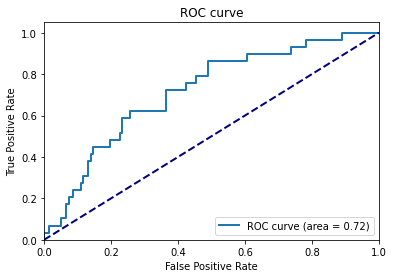

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

roc_plotter(fpr, tpr, roc_auc)
